# Time Series Similarity Checker Tutorial

## Introduction

Welcome to this Jupyter Notebook tutorial on time series similarity checker. In this tutorial, we will walk through the process of similarity checking between two time series signals using the toolkit we created.

## Time Series data on Gas Chromatography

Gas chromatography (GC) is an analytical technique used to separate and analyze compounds within a sample. It finds applications across various scientific fields such as chemistry, pharmaceuticals, environmental science, and forensics.

### Principle of Gas Chromatography

Gas chromatography functions by separating a mixture into its individual components based on their distribution between a stationary phase and a mobile phase within a chromatographic column. When the sample is vaporized and injected into the GC system, the components interact differently with the stationary phase, resulting in varied travel rates through the column, hence achieving separation.

### Components of Gas Chromatography

1. **Injector:** This component introduces the sample into the gas chromatograph. It vaporizes the sample and injects it into the carrier gas stream, which carries the sample through the column.

2. **Column:** The column is the core of the gas chromatograph. It consists of a long, coiled tube packed with a stationary phase or coated with it on the inner wall. The interactions between sample components and the stationary phase cause separation.

3. **Carrier Gas:** Typically an inert gas like helium, nitrogen, or hydrogen, the carrier gas transports the sample through the column.

4. **Detector:** The detector identifies and quantifies the separated components as they elute from the column. Common detectors include flame ionization detector (FID), thermal conductivity detector (TCD), electron capture detector (ECD), and mass spectrometer (MS).

Gas chromatography is a powerful tool for analyzing complex mixtures, identifying compounds, and quantifying their presence within a sample, making it an invaluable technique in analytical chemistry and various scientific disciplines.

## Table of Contents

- **[Import Required Libraries and Tool Kit](#1--import-required-libraries-and-tool-kit)**    
- **[Data Loading and Preprocessing](#2--data-loading-and-preprocessing)**

    - **[Instantiate Data Manager and Load data](#21--instantiate-data-manager-and-load-data)**
    - **[Preprocess Data](#22--preprocess-data)**
    - **[Interpolate Nulls](#23--interpolate-nulls)**
    - **[Data Splitting](#24--data-splitting)**
    - **[Data Standardization](#25--data-standardization)**

- **[Similarity Checking](#3--similarity-checker)**

    - **[Instantiate Similarity Checker and Fit](#31--instantiate-similarity-checker-and-fit)**
    - **[Calculate Similarity using Different Methods](#32--calculate-similarity-using-different-methods)**
    - **[Plot Signals](#33--plot-signals)**

    
## Code Structure

Throughout this notebook, we'll be using Python and the following libraries:

- [pathlib](https://docs.python.org/3/library/pathlib.html) for working with file paths.
- [uuid](https://docs.python.org/3/library/uuid.html) for generating unique identifiers.
- [tstoolkit](TS Toolkit Documentation) for time series analysis and modeling.

## Let's Get Started!

We'll begin by importing the necessary libraries and tools and proceed step by step through the time series forecasting process.

## 1- Import Required Libraries and Tool Kit

In [1]:
# Import the Path class for working with file system paths
from pathlib import Path

# Import the DataManager class for data preprocessing
from tstoolkit.data_preprocess import DataManager

# Import the TimeSeriesSimilarityChecker from similarity module for similarity checking
from tstoolkit.similarity import TimeSeriesSimilarityChecker

## 2- Data Loading and Preprocessing

In this section, we load and preprocess the time series data.

### 2.1- Instantiate Data Manager and Load Data
- Data Path: The data_path variable contains the file path or URL to the time series data in HDF5 format.
- DataManager: The data_manager object is an instance of a data management class (you should provide more details about this class if necessary) used to handle data loading and preprocessing.
- Load Data: We load the time series data from the specified path.

In [2]:
# Define the path to the time series data file
data_path = Path("../data/example_data.hd5")

# Create an instance of a data manager (DataManager) with the specified data file path
data_manager = DataManager(data_path)

# Load the time series data from the specified data file
data = data_manager.load_data()

### 2.2- Preprocess Data
- The data is preprocessed to reshape the data into a format suitable for the model

In [3]:
# Preprocess the time series data
data = data_manager.preprocess_data(data)

### 2.3- Interpolate Nulls
We fill any nulls in our time series, to prevent errors during training.

- Any missing or NaN values in the data are filled using interpolation techniques and possible methods described in the documentation.

In [4]:
# Fill gaps or missing values in the time series data using linear interpolation
data = data_manager.interpolate_nulls(data, interpolation_method="linear")

# View top 5 rows of the processed data
data.head()

,DateTime,300468,300498,305256,315036,340686,341124,341550
0,2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
1,2020-01-01 00:00:30,59.085239,2036.812866,67.127098,114.341003,1.691197,5.378604,1.403499
2,2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
3,2020-01-01 00:01:30,74.437500,2036.780334,71.723625,114.207180,1.830390,5.459568,1.512679
4,2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172


### 2.4- Data Splitting
Now, we split the preprocessed data into training and testing sets.
- Split Data: We split data to create the train/validation/test splits. To change more parameters, read documentation.

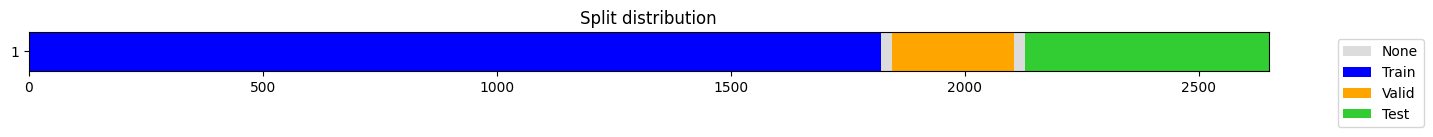

In [5]:
# Split the time series data into training, validation, and test sets (It is required for standardization process)
splits = data_manager.split_data(data, show_plot=True)

### 2.5- Data Standardization
Finally, we standardize the data to ensure consistent scales for modeling. We also save pipeline for later use in model learner.
- The data is standardized to have a mean of 0 and a standard deviation of 1. The standardize_pipe variable holds the standardization pipeline.

In [6]:
# Standardize the time series data using a specified pipeline
data_standardized, standardize_pipe = data_manager.standardize_data(data, splits, data.columns[1:], verbose=False)

## 3- Similarity Checker

We will check similarity of time series signals

### 3.1- Instantiate Similarity Checker and Fit

To begin, We create an instance of the `TimeSeriesSimilarityChecker` class (`similarity_checker`) and initialize it with the provided time series data. This checker will be used to calculate similarity between time series.

In [13]:
# Create an instance of the TimeSeriesSimilarityChecker class and provide it with time series data
similarity_checker = TimeSeriesSimilarityChecker()

# Fit data to similarity checker
similarity_checker.fit(data)

### 3.2- Calculate Similarity Using Different Methods

Now, we calculate similarity between two time series using different similarity measurement methods.

- **Pearson Correlation:** Calculate Pearson Correlation similarity between two time series.
- **Cosine Similarity:** Calculate Cosine Similarity between the two time series.
- **Dynamic Time Warping:** Calculate Dynamic Time Warping between two time series.

##### Pearson Correlation

Pearson correlation measures the linear correlation between two variables. It gives a value between -1 and 1, where:

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

The formula for Pearson correlation between variables X and Y is:

ρ_{X,Y} = cov(X, Y) / (σ_X * σ_Y)

Where:
- ρ_{X,Y} is the Pearson correlation coefficient.
- cov(X, Y) is the covariance between X and Y.
- σ_X and σ_Y are the standard deviations of X and Y, respectively.

In [9]:
# Calculate and print Pearson Correlation similarity
pearson_similarity = similarity_checker.pearson_correlation('341124', '341550')
print("Pearson Correlation:", pearson_similarity)

Pearson Correlation: 0.1658787146834208


##### Cosine Similarity

Cosine similarity measures the cosine of the angle between two non-zero vectors. It is commonly used to determine the similarity between documents in text analysis or item similarity in recommendation systems. For two vectors A and B, the cosine similarity is calculated as:

cosine_similarity(A, B) = (A ⋅ B) / (‖A‖ * ‖B‖)

Where:
- A ⋅ B is the dot product of vectors A and B.
- ‖A‖ and ‖B‖ are the magnitudes of vectors A and B, respectively.

In [10]:
# Calculate and print Cosine Similarity
cosine_similarity = similarity_checker.cosine_similarity('341124', '341550')
print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.24053768880662582


#### DTW (Dynamic Time Warping)

DTW is a method used to measure similarity between two sequences that may vary in time or speed. It is particularly useful in comparing sequences of different lengths or sequences that are time-warped versions of each other. DTW finds an optimal alignment between the sequences by warping them in time, minimizing the total distance between corresponding points.

The DTW algorithm computes the distance between two sequences by finding the optimal path through a cost matrix. This distance considers both the values of the elements and their positions in the sequences.

In [11]:
# Calculate and print Dynamic Time Warping similarity
dtw_similarity = similarity_checker.dynamic_time_warping('341124', '341550')
print("Dynamic Time Warping:", dtw_similarity)

Dynamic Time Warping: 1867.6564181784383


### 3.3- Plot Signals

Moreover, we visualize and compare the signals of two specific time series.

- **Signal Plotting:** The `plot_signals()` method of the `similarity_checker` to generate a plot that displays the signals of the two selected time series. This visualization helps us understand the similarity or dissimilarity in the patterns of the two time series.

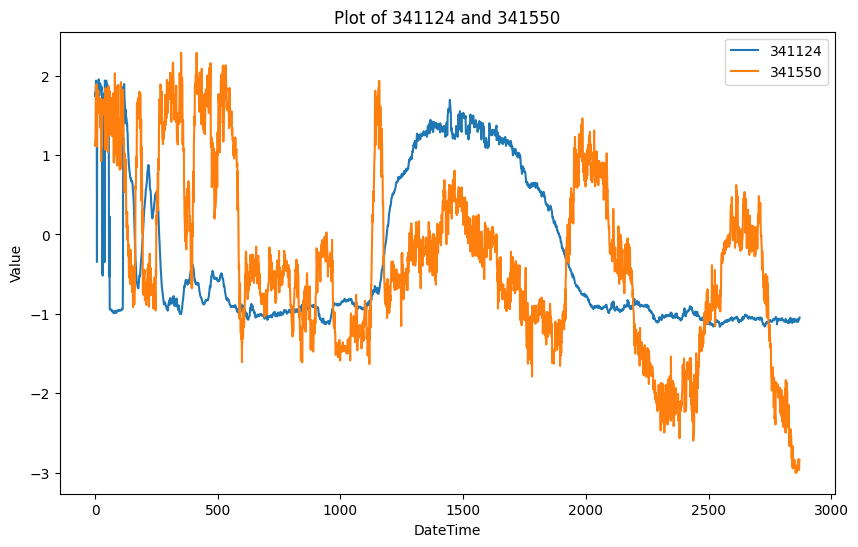

In [12]:
# Use the similarity checker to plot the signals of two specific time series ('341124' and '341550')
similarity_checker.plot_signals('341124', '341550')